# NOAA NDBC buoy data analysis
***
Lesson for learning python.<br> Practicing downloading, opening, and analyzing buoy data from NDBC: https://www.ndbc.noaa.gov/


With JupyterLite, your code is broken up into “Cells”, and you can run each cell individually. This allows you to work progressively and view the results of each chunk of code. Hover over the symbols at the top of this notebook to see what they do. 

### 1. Import packages
***
First we’ll import some commonly used libraries into our notebook that are used to open, manipulate, and plot data. See the four packages listed in the cell below: [pandas](https://pypi.org/project/pandas/), [matplotlib](https://matplotlib.org/), [numpy](https://numpy.org/), and [datetime](https://docs.python.org/3/library/datetime.html).

Click on the gray code cell below. A border should appear around the cell.

To run the cell, press **<em>shift + enter</em>** on your keyboard, or click the single right-pointing arrow on the ribbon at the top of the notebook. While the code is running, an asterisk [\*] will appear in the brackets left of the cells. You will know the code cell ran successfully if a number [1] appears in the bracket.

In [1]:
# this is a comment, using a hashtag
# use comments to make notes of what you're doing

# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### 2. Download NDBC buoy data
***

We are going to look at data from Station Papa, which is one of the oldest continuous monitoring stations in the ocean.

Go to https://www.ndbc.noaa.gov/ and type 46246 in the Station ID Search bar.

Scroll all the way to the bottom of the page and click on the link for “Historical Data & Climatic Summaries”. 

You will be brought to a new page: pick any year you want that is available after “Standard meteorological data”. 

Click the file link under **Method Two**, the save the file to your computer. Give the file an appropriate name (or keep as is) and keep track of where you save it. To save, either right cilck somewhere on the screen and select **Save as...** OR select "File" on the browser menu and then select "Save As"


You can view the data in its raw, text format if you want. Click on the file and check it out! If you need help interpreting the names at the top of the columns, check out this legend on the NDBC site: https://www.ndbc.noaa.gov/faq/measdes.shtml

### 3. Import NDBC buoy data
***

<img src="supp_info/data_file.png" width="200" align="right"> 


Now we'll upload an NDBC buoy data file we have downloaded.

The left side of the screen shows folders on the JupyterLite webpage. **<em>Drag and drop</em>** your NDBC buoy data text file into the main folder containing this notebook, or use the “Upload Files” icon (upward pointing arrow on the top left of the page) to upload your file. 

Once the file is uploaded, assign the name of your text file to the variable `filename` in the code cell below. Make sure to use quotation marks around the name as in the example below. Note: be sure to change the name in the example code below so the filename matches your filename. 

**<em>Run</em>** the cell.

The code line below where you specified the filename will use the pandas `read_table` function to read the data into a data frame in the code. Learn more about this function [here](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html).


<!-- ![SegmentLocal](/Users/username/some-folder/191px-Seven_segment_display-animated.gif "segment")
<img src="FileName.gif" width="750" align="center"> -->

<!-- ![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess") -->

In [2]:
# specify the name of the text file
filename = 'supp_info/46246h2016.txt' 

# use pandas to read text file into dataframe called 'df_raw'
df_raw = pd.read_table(filename, delim_whitespace=True, header = [0,1])
df_raw

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
0,2016,1,3,22,28,999,99.0,99.0,3.85,9.88,7.87,211,9999.0,999.0,7.4,999.0,99.0,99.0
1,2016,1,3,22,58,999,99.0,99.0,4.08,9.88,7.66,183,9999.0,999.0,7.4,999.0,99.0,99.0
2,2016,1,3,23,28,999,99.0,99.0,4.03,9.88,7.96,168,9999.0,999.0,7.4,999.0,99.0,99.0
3,2016,1,3,23,58,999,99.0,99.0,3.68,9.88,7.84,179,9999.0,999.0,7.3,999.0,99.0,99.0
4,2016,1,4,0,28,999,99.0,99.0,3.86,9.09,7.88,181,9999.0,999.0,7.3,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16312,2016,12,31,21,58,999,99.0,99.0,2.85,12.50,8.31,282,9999.0,999.0,6.8,999.0,99.0,99.0
16313,2016,12,31,22,28,999,99.0,99.0,3.24,15.38,9.36,283,9999.0,999.0,6.8,999.0,99.0,99.0
16314,2016,12,31,22,58,999,99.0,99.0,2.96,15.38,9.47,285,9999.0,999.0,6.8,999.0,99.0,99.0



### 4. Clean the data (remove NaNs)
***

Let’s clean this data by removing any columns filled with empty data. We can tell python which values are NaN, or Not-A-Number. Refer back to the [NDBC Measurement Descriptions and Units](https://www.ndbc.noaa.gov/faq/measdes.shtml) page to determine which values in the data are NaNs. 

Let’s read the data in again, this time into a variable called `df`. This time tell python to drop any columns filled only with `NaN` values. 

**<em>Run</em>** the cell below.

In [3]:
# list of data values representing NaNs
NaN = ['999', '999.0', '99.0', '9999.0']

# read in data again, but drop any columns or rows filled only with NaNs
df = pd.read_table(filename, delim_whitespace=True, header = [0,1], na_values = NaN).dropna(axis='columns', how='all').dropna(axis='rows', how='all')

df

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,MWD,WTMP
,#yr,mo,dy,hr,mn,m,sec,sec,degT,degC
0,2016,1,3,22,28,3.85,9.88,7.87,211.0,7.4
1,2016,1,3,22,58,4.08,9.88,7.66,183.0,7.4
2,2016,1,3,23,28,4.03,9.88,7.96,168.0,7.4
3,2016,1,3,23,58,3.68,9.88,7.84,179.0,7.3
4,2016,1,4,0,28,3.86,9.09,7.88,181.0,7.3
...,...,...,...,...,...,...,...,...,...,...
16312,2016,12,31,21,58,2.85,12.50,8.31,282.0,6.8
16313,2016,12,31,22,28,3.24,15.38,9.36,283.0,6.8
16314,2016,12,31,22,58,2.96,15.38,9.47,285.0,6.8


### 5. Clean the data (create datetime objects)
***
We're almost ready to analyze the data. However, notice that the date information is spread across five columns. This is alright, but can make it more challenging to plot the timeseries data in a meaningful way.

We can combine these five date information columns into single datetime objects containing the full date and time information. To do this, we will need to access the data in the five columns corresponding to date information. You can access the data in a given column by typing `df[col]` where `col` is the name of the desired data column in quotation marks. For example, `df["MM"]` would access the months data column.


**<em>Run</em>** the cell below to access the date data and combine them into a single array called `dates`.

In [4]:
# read date data into individual data arrays
years = df['#YY']
months = df['MM']
days = df['DD']
hours = df['hh']
mins = df['mm']

# combine them into a single array called ‘dates’
dates = [datetime.datetime.strptime(f'{y}-{m:02d}-{d:02d}T{h:02d}:{mm:02d}', '%Y-%m-%dT%H:%M') for y, m, d, h, mm in zip(years['#yr'], months['mo'], days['dy'], hours['hr'], mins['mn'])]


**<em>Run</em>** the cell below to add the date objects stored in `dates` to a new column in `df` called `"date"`. Look at the new `df` and make sure you see the new data column you created.

In [5]:
# add the dates to a new data column in df called 'date'
df['date'] = dates

df

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,MWD,WTMP,date
,#yr,mo,dy,hr,mn,m,sec,sec,degT,degC,
0,2016,1,3,22,28,3.85,9.88,7.87,211.0,7.4,2016-01-03 22:28:00
1,2016,1,3,22,58,4.08,9.88,7.66,183.0,7.4,2016-01-03 22:58:00
2,2016,1,3,23,28,4.03,9.88,7.96,168.0,7.4,2016-01-03 23:28:00
3,2016,1,3,23,58,3.68,9.88,7.84,179.0,7.3,2016-01-03 23:58:00
4,2016,1,4,0,28,3.86,9.09,7.88,181.0,7.3,2016-01-04 00:28:00
...,...,...,...,...,...,...,...,...,...,...,...
16312,2016,12,31,21,58,2.85,12.50,8.31,282.0,6.8,2016-12-31 21:58:00
16313,2016,12,31,22,28,3.24,15.38,9.36,283.0,6.8,2016-12-31 22:28:00
16314,2016,12,31,22,58,2.96,15.38,9.47,285.0,6.8,2016-12-31 22:58:00


### 6. Plot Data
***

There are many ways to plot data. A simple one is shown below. **<em>Run</em>** the cell below to plot the **water temperature** data.

Try changing `'WTMP'` to another column name to plot a different data variable.

<AxesSubplot:>

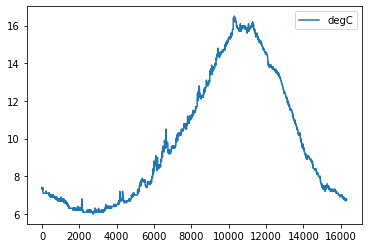

In [6]:
df['WTMP'].plot()

What are the x and y axes of the plot?

It’s better to be more specific when plotting to make sure we know what we are looking at. When plotting, we can specify what to use as the x and y axes of the plot, as well as what kind of plot to make. 

**<em>Run</em>** the cell below to make a timeseries of the **water temperature** data.

<AxesSubplot:xlabel='date'>

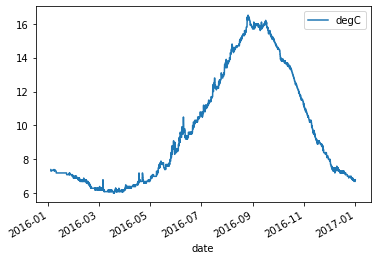

In [7]:
df.plot(x='date', y='WTMP', kind = 'line')

Now we'll modify the code above to plot a timeseries of the **wave direction** variable. 

**<em>Run</em>** the cell below to make a timeseries of the **wave direction** data.

Can you tell what the most common wave direction is? 

<AxesSubplot:xlabel='date'>

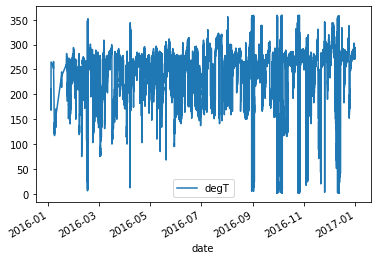

In [8]:
df.plot(x='date', y='MWD', kind = 'line')

Make a histogram of the wave direction variable using the code below. Is it easier to determine what the most frequent wave direction is? What is it?

<AxesSubplot:ylabel='Frequency'>

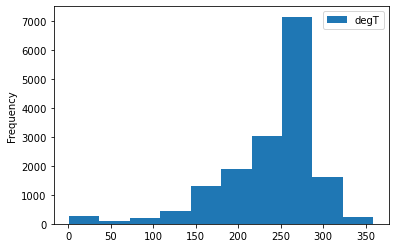

In [9]:
df['MWD'].plot(kind='hist') 

### 7. Analyze Data
***

Return to your timeseries plot of **water temperature** data. 

1. What is the mean and standard deviation of the water temperature data?

2. Can you tell what percentage of the total time the water was above 10 degrees Celsius? 

3. Can you determine the minimum or maximum temperatures and when these occurred?

We can use code to answer these questions precisely!


#### Task 1

**<em>Run</em>** the cell below to calculate and print the mean and standard deviation in water temperatures.

In [10]:
print(df['WTMP'].mean())
print()
print(df['WTMP'].std())

degC    9.815714
dtype: float64

degC    3.355409
dtype: float64


#### Task 2

**<em>Run</em>** the cell below to highlight times where the water temperature was above 10 degrees C, and calculate what percentage of time this was the case.

Modify the first line of code `T = 10` to set a different temperature threshold, and **<em>run</em>** the cell again.

Use this to determine how often the water temperature was more than a standard deviation above the mean, and over which months this occurred.
  



percentage of time water temp is above 10 degC: 40.5%



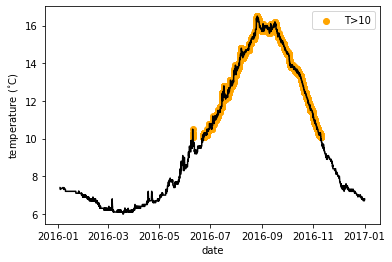

In [11]:
# temperature threshold (degC)
T = 10

# total time series length
total_duration = len(df)
# length of time with temperature above threshold
duration_above = np.sum(df['WTMP'] > T).values[0]
# percentage of time above temperature threshold
time_per = 100*duration_above/total_duration

print(f'\npercentage of time water temp is above {T} degC: {time_per:.1f}%\n')

# plot the data
fig, ax = plt.subplots()
plt.plot(df['date'], df['WTMP'].values, c='black')
plt.scatter(df[(df['WTMP'] > T).any(axis=1)].date, df[(df['WTMP'] > T).any(axis=1)].WTMP, c='orange', label=f'T>{T}');
plt.xlabel('date')
plt.ylabel('temperature ($^{\circ}$C)')
plt.legend();
fig.savefig('water_temp.png', dpi=300);

Notice that this code also saved your plot as `water_temp.png`. You can download the image to your computer by right clicking the file name and selecting **Download**.

<img src="supp_info/save_img.png" width="200" align="right"> 

#### Task 2

Use the code below to find min and max temperature values, and when these occurred.


max WTMP 6.0 degC occurred on 2016-08-25T22:28:00.000000000
min WTMP 16.5 degC occurred on 2016-03-18T12:58:00.000000000



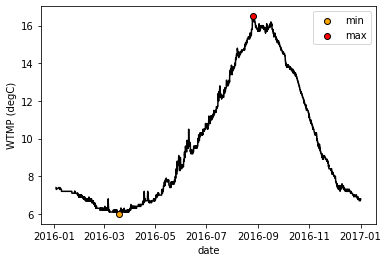

In [12]:
# specify data columm
col = 'WTMP'

# find min/max values
min_val = df[col].min()[0]
max_val = df[col].max()[0]

# find dates of min/max value occurrences
date_min = df.iloc[df[col].idxmin()].date.values[0]
date_max = df.iloc[df[col].idxmax()].date.values[0]

# print
print(f"\nmax {col} {min_val} {df[col].columns[0]} occurred on {date_max}")
print(f"min {col} {max_val} {df[col].columns[0]} occurred on {date_min}\n")

# plot the data
fig, ax = plt.subplots()
plt.plot(df['date'], df[col].values, c='black', zorder=-1)
plt.scatter(date_min, min_val, c='orange', edgecolor='k', label='min');
plt.scatter(date_max, max_val, c='red', edgecolor='k', label='max');
plt.xlabel('date')
plt.ylabel(f'{col} ({df[col].columns[0]})')
plt.legend();
fig.savefig('water_temp_minmax.png', dpi=300)


What is the answer? Modify the col variable to answer this same question for a different data variable. Note that this will only print the first date of occurrence if these values were reached multiple times. 

This code saves the produced plot as water_temp_minmax.png


#### Bonus Task
Use the code below to create a python function which subsets the data over a date range.


In [13]:
# create a function to find index of date in python range 
def subset_by_date(date_i, date_f, df):
    # date_i: initial date 
    # date_f: final date 
    # df: pandas dataframe
    indices = []
    for date in [date_i, date_f]:
        if np.sum(df.date == date) == 0: 
            print(f'date {date} not in file') # print error if given date not in file
        else:
        # find index of specified date
            index = df[df.date == date].index.values[0]
            indices.append(index)
    print(f'\nsubset data between {date_i} and {date_f}\n')
    return df[indices[0]:indices[1]]


Run the code. In a cell below, run the following code to plot over a specified date range. Modify the date range by changing  date1 and date2 so that your code refers to some range of dates in your specific dataset. You will get an error if either date1 or date2 do not correspond to dates in your dataset. 


subset data between 2016-06-01 01:28:00 and 2016-07-31 23:28:00



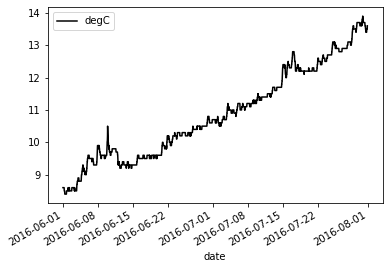

In [14]:
# specify start and end dates of desired date range
date1 = datetime.datetime(year = 2016, month = 6, day = 1, hour = 1, minute = 28)
date2 = datetime.datetime(year = 2016, month = 7, day = 31, hour = 23, minute = 28)

# run the function to create subsetted dataframe
df_subset = subset_by_date(date1, date2, df)
# make plot
df_subset.plot(x='date', y='WTMP', kind = 'line', color='black');

### Closing out

Once you are finished, navigate to **File** in the top ribbon of the webpage. 

From there, **save** the notebook. 

Then, you can **Download** the notebook to save it to your computer. 

Once you are all finished, select **Close and Shutdown Notebook** to terminate the code.

<img src="supp_info/close.png" width="400" align="right"> 

The code you created today can be modified to explore different data. If you’d like to run the code again on JupyterLite at a later date, keep track of the notebook you created today and the link to where you downloaded the data. You can re-upload both to JupyterLite and run the code again, or modify it to explore a new data set.